# Hari 4: Analisis Data Eksplorasi (Exploratory Data Analysis/EDA)

## Import Library yang Dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tampilan grafik
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

# Mengabaikan warning
import warnings
warnings.filterwarnings('ignore')

## 1. Memuat Dataset

In [3]:
# Menggunakan dataset Titanic dari seaborn
titanic = sns.load_dataset('titanic')

# Melihat 5 baris pertama data
print("Dataset Titanic - 5 Baris Pertama:")
display(titanic.head())

# Informasi dataset
print("Informasi Dataset:")
titanic.info()

# Statistik deskriptif
print("Statistik Deskriptif:")
display(titanic.describe())

Dataset Titanic - 5 Baris Pertama:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
Statistik Deskriptif:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Analisis Data Univariat

### 2.1 Analisis Variabel Kategorikal

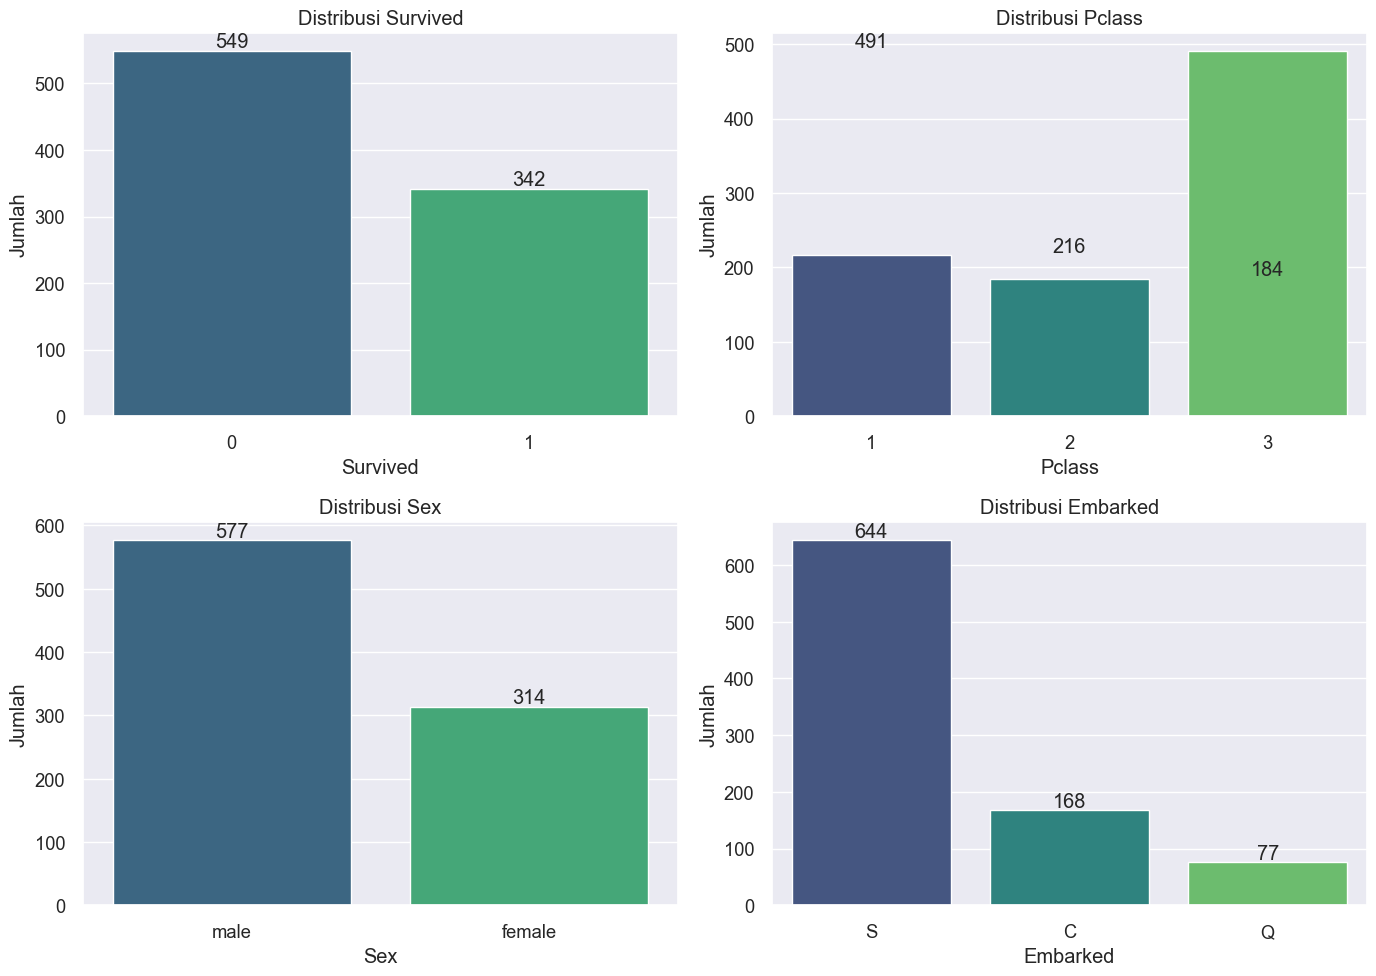

Persentase Survived:
Meninggal (0): 61.62%
Bertahan (1): 38.38%


In [4]:
# Memeriksa distribusi variabel kategorikal
categorical_vars = ['survived', 'pclass', 'sex', 'embarked']

# Membuat subplot untuk setiap variabel kategorikal
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    # Menghitung frekuensi
    counts = titanic[var].value_counts()
    
    # Membuat bar plot
    sns.countplot(x=var, data=titanic, ax=axes[i], palette='viridis')
    
    # Menambahkan label
    axes[i].set_title(f'Distribusi {var.capitalize()}')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Jumlah')
    
    # Menambahkan nilai di atas bar
    for j, v in enumerate(counts):
        axes[i].text(j, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()

# Menampilkan persentase untuk variabel survived (bertahan hidup)
survival_percentage = titanic['survived'].value_counts(normalize=True) * 100
print("Persentase Survived:")
print(f"Meninggal (0): {survival_percentage[0]:.2f}%")
print(f"Bertahan (1): {survival_percentage[1]:.2f}%")

### 2.2 Analisis Variabel Numerik

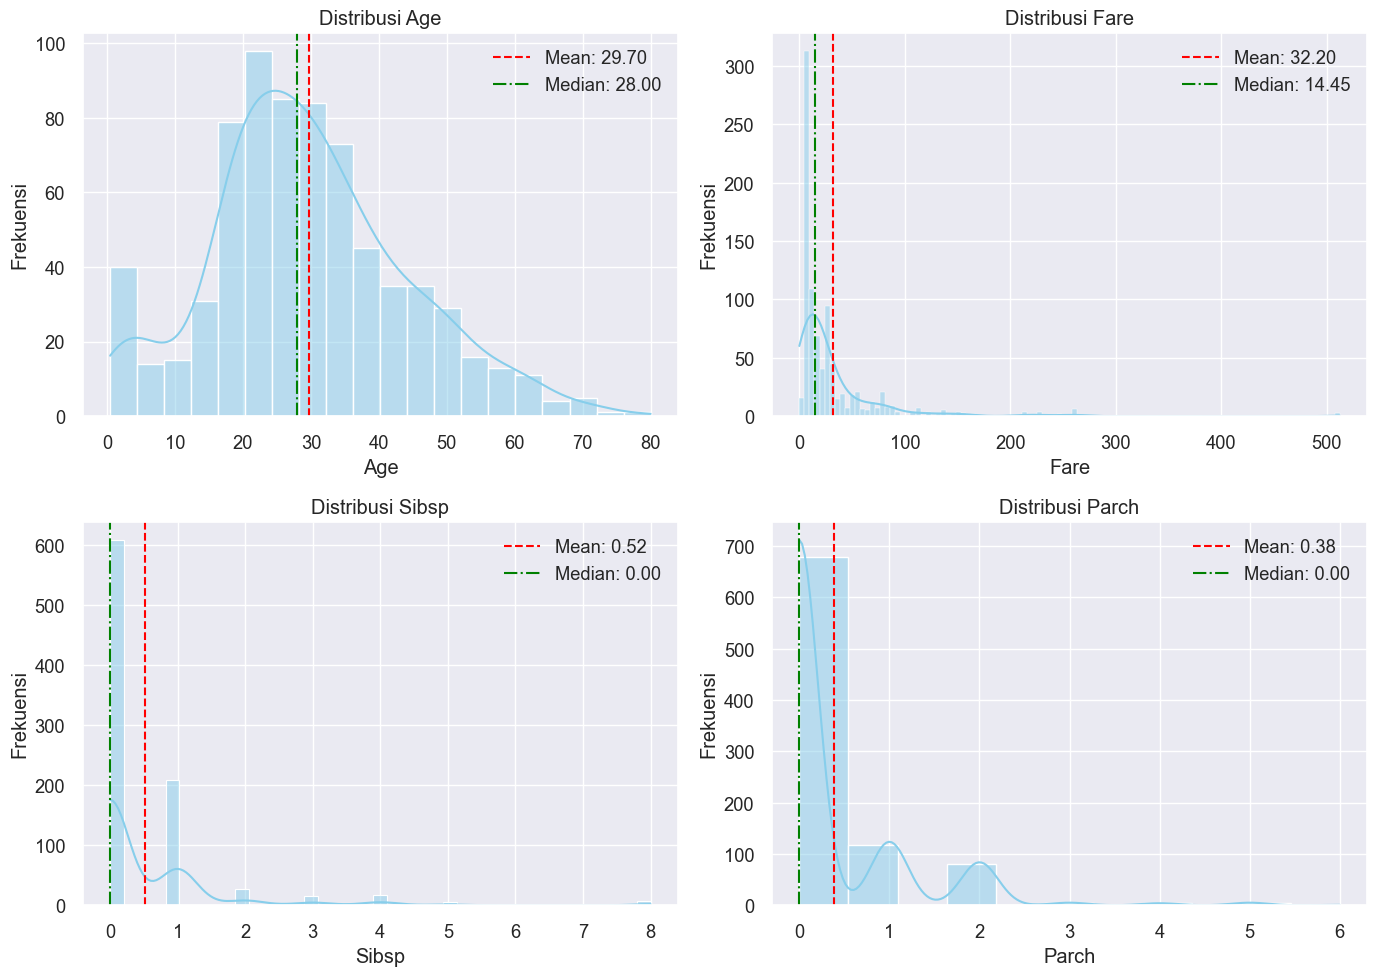

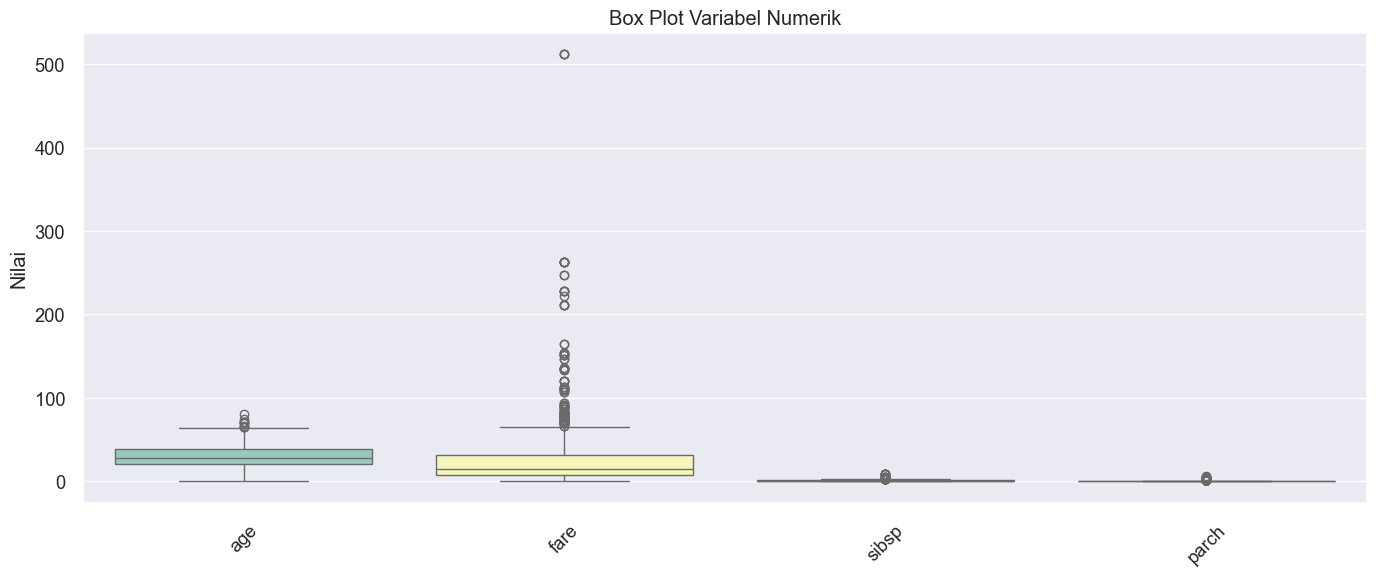

In [5]:
# Memeriksa distribusi variabel numerik
numerical_vars = ['age', 'fare', 'sibsp', 'parch']

# Membuat subplot untuk setiap variabel numerik
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(numerical_vars):
    # Histogram dengan KDE
    sns.histplot(titanic[var].dropna(), kde=True, ax=axes[i], color='skyblue')
    
    # Menambahkan label
    axes[i].set_title(f'Distribusi {var.capitalize()}')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Frekuensi')
    
    # Menambahkan garis untuk mean dan median
    mean_val = titanic[var].mean()
    median_val = titanic[var].median()
    
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Box plot untuk variabel numerik
plt.figure(figsize=(14, 6))
sns.boxplot(data=titanic[numerical_vars], palette='Set3')
plt.title('Box Plot Variabel Numerik')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Analisis Data Bivariat

### 3.1 Hubungan antara Variabel Kategorikal dan Target (Survived)

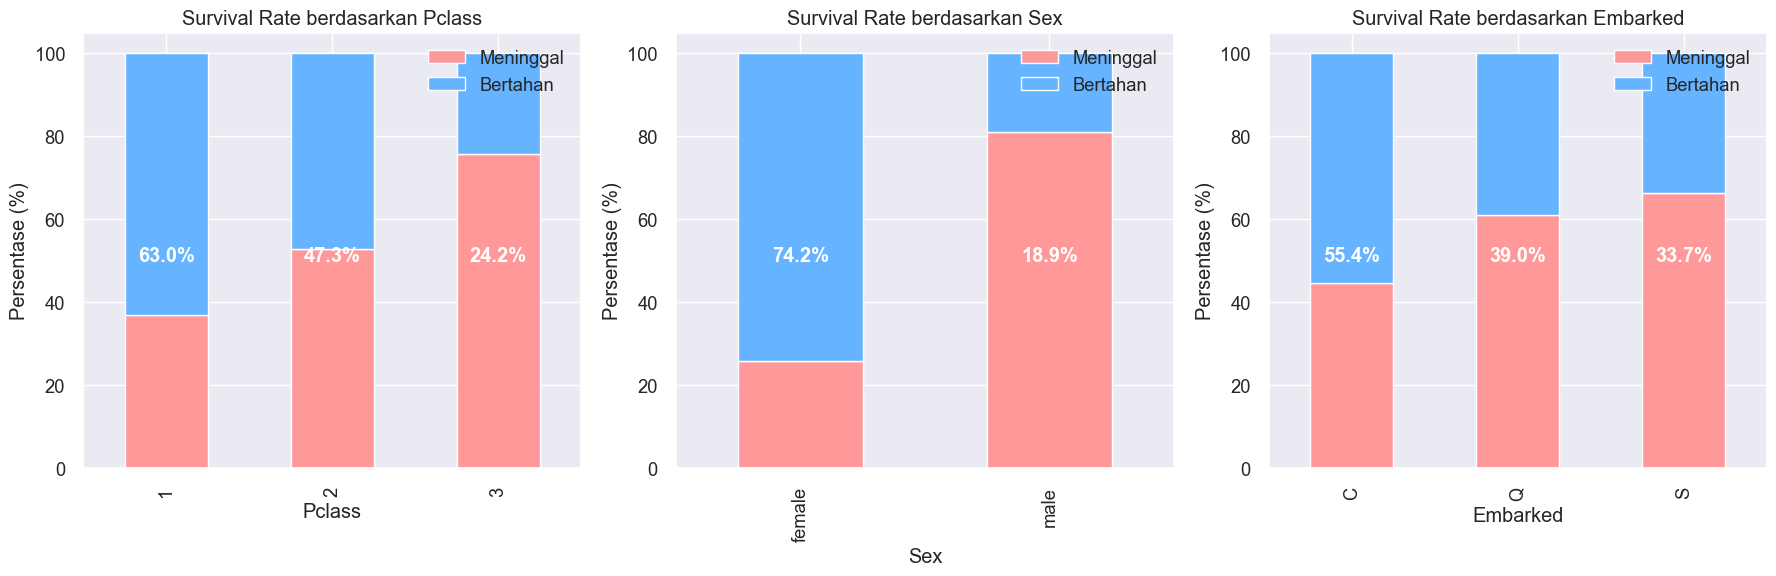

In [6]:
# Hubungan antara variabel kategorikal dan survived
categorical_features = ['pclass', 'sex', 'embarked']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(categorical_features):
    # Membuat crosstab
    ct = pd.crosstab(titanic[feature], titanic['survived'])
    
    # Menghitung persentase survival rate
    ct_percentage = ct.div(ct.sum(axis=1), axis=0) * 100
    
    # Bar plot
    ct_percentage.plot(kind='bar', stacked=True, ax=axes[i], color=['#ff9999', '#66b3ff'])
    
    # Menambahkan label
    axes[i].set_title(f'Survival Rate berdasarkan {feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Persentase (%)')
    axes[i].legend(['Meninggal', 'Bertahan'])
    
    # Menambahkan nilai persentase di atas bar
    for j, p in enumerate(ct_percentage.iterrows()):
        survived_pct = p[1][1]
        axes[i].text(j, 50, f'{survived_pct:.1f}%', ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

### 3.2 Hubungan antara Variabel Numerik dan Target (Survived)

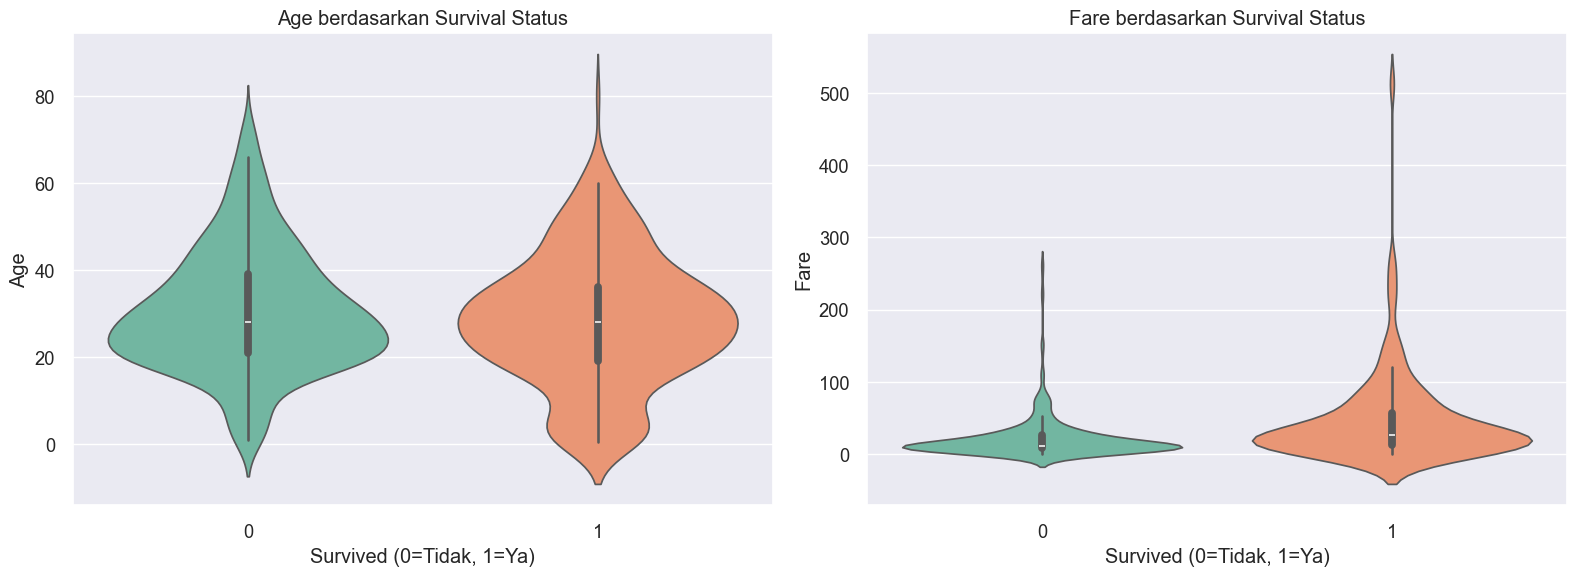

<Figure size 1200x600 with 0 Axes>

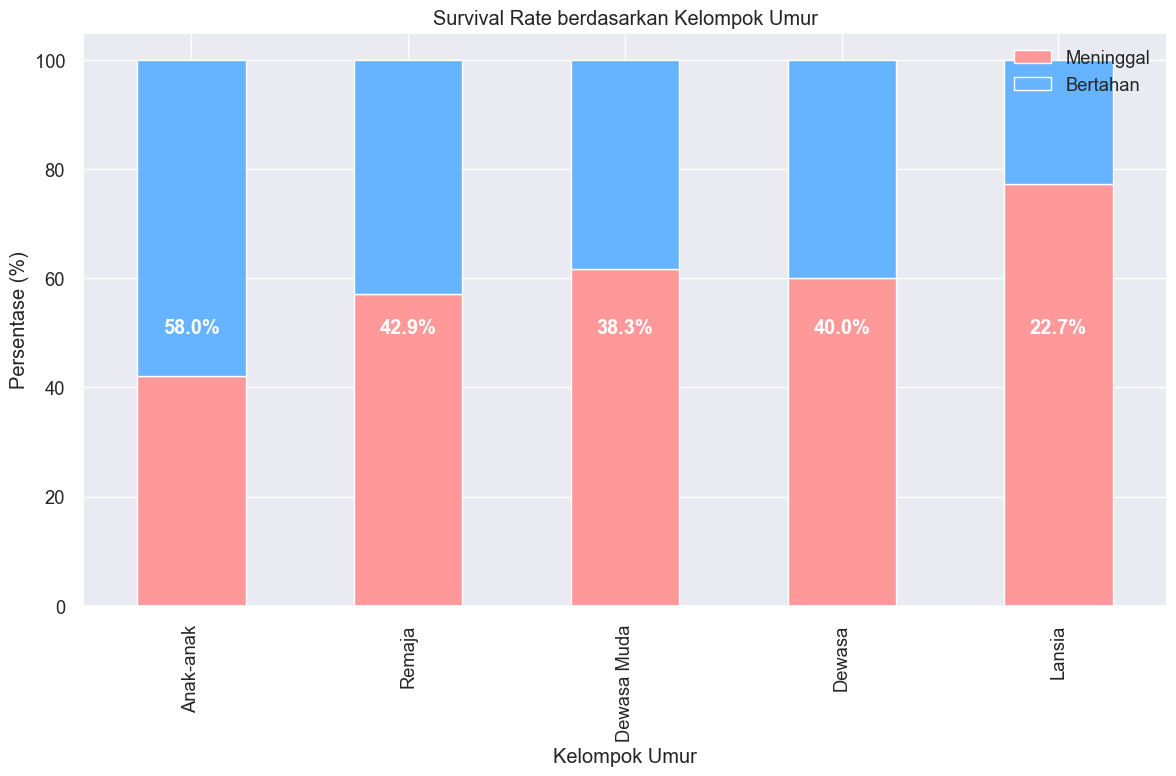

In [7]:
# Hubungan antara variabel numerik dan survived
numerical_features = ['age', 'fare']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i, feature in enumerate(numerical_features):
    # Violin plot
    sns.violinplot(x='survived', y=feature, data=titanic, ax=axes[i], palette='Set2')
    
    # Menambahkan label
    axes[i].set_title(f'{feature.capitalize()} berdasarkan Survival Status')
    axes[i].set_xlabel('Survived (0=Tidak, 1=Ya)')
    axes[i].set_ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

# Membuat age bins untuk analisis lebih detail
titanic['age_group'] = pd.cut(titanic['age'], bins=[0, 12, 18, 35, 60, 100], 
                             labels=['Anak-anak', 'Remaja', 'Dewasa Muda', 'Dewasa', 'Lansia'])

# Survival rate berdasarkan kelompok umur
age_survival = pd.crosstab(titanic['age_group'], titanic['survived'])
age_survival_pct = age_survival.div(age_survival.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
age_survival_pct.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
plt.title('Survival Rate berdasarkan Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Persentase (%)')
plt.legend(['Meninggal', 'Bertahan'])

# Menambahkan nilai persentase di atas bar
for i, p in enumerate(age_survival_pct.iterrows()):
    if not np.isnan(p[1][1]):  # Memeriksa apakah nilai bukan NaN
        survived_pct = p[1][1]
        plt.text(i, 50, f'{survived_pct:.1f}%', ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Analisis Data Multivariat

### 4.1 Hubungan antara Beberapa Variabel

<Figure size 1200x600 with 0 Axes>

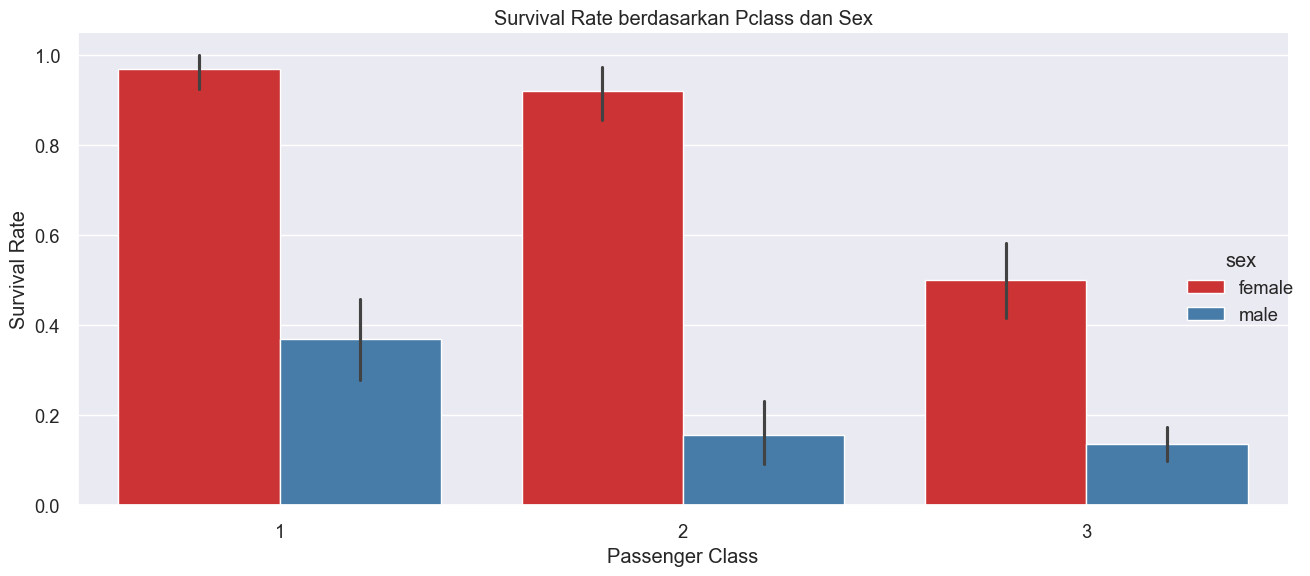

<Figure size 1200x800 with 0 Axes>

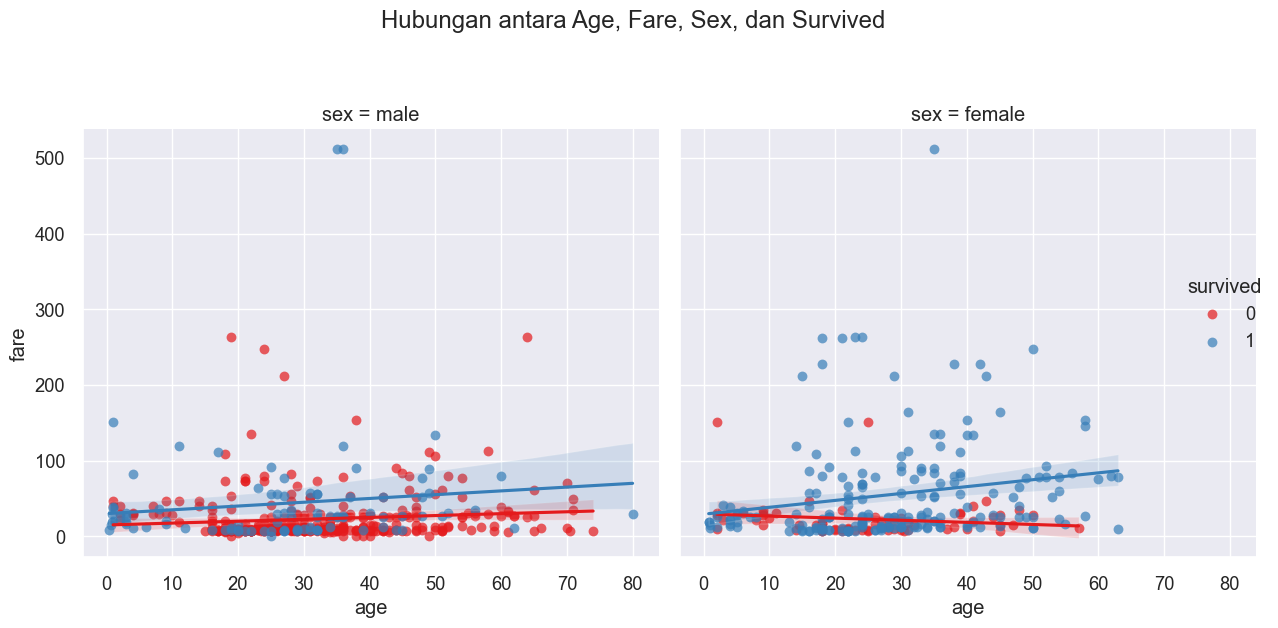

In [8]:
# Hubungan antara Pclass, Sex, dan Survived
plt.figure(figsize=(12, 6))
sns.catplot(x='pclass', y='survived', hue='sex', kind='bar', data=titanic, height=6, aspect=2, palette='Set1')
plt.title('Survival Rate berdasarkan Pclass dan Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

# Hubungan antara Age, Sex, dan Survived
plt.figure(figsize=(12, 8))
sns.lmplot(x='age', y='fare', hue='survived', col='sex', data=titanic, height=6, aspect=1, palette='Set1',
          scatter_kws={'alpha': 0.7, 's': 50})
plt.suptitle('Hubungan antara Age, Fare, Sex, dan Survived', y=1.05)
plt.tight_layout()
plt.show()

### 4.2 Matriks Korelasi

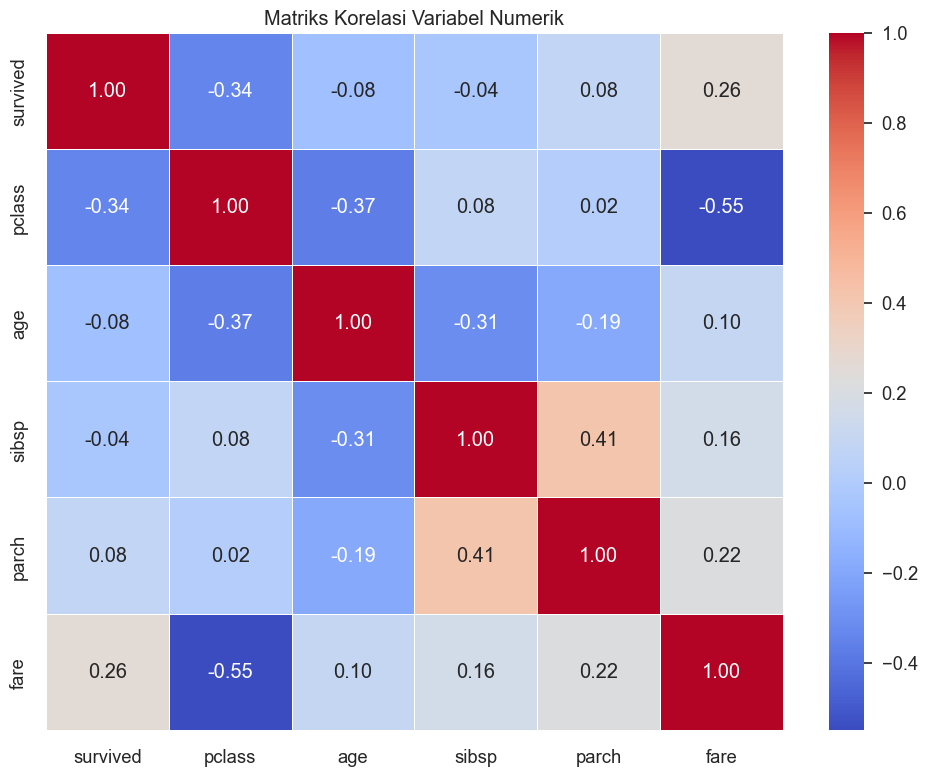

Korelasi dengan Survived:
survived    1.000000
fare        0.257307
parch       0.081629
sibsp      -0.035322
age        -0.077221
pclass     -0.338481
Name: survived, dtype: float64


In [9]:
# Membuat matriks korelasi untuk variabel numerik
numeric_titanic = titanic.select_dtypes(include=['number'])

# Menghitung korelasi
correlation = numeric_titanic.corr()

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Matriks Korelasi Variabel Numerik')
plt.tight_layout()
plt.show()

# Menampilkan korelasi dengan survived
print("Korelasi dengan Survived:")
survived_corr = correlation['survived'].sort_values(ascending=False)
print(survived_corr)

## 5. Visualisasi Lanjutan

<Figure size 1200x1000 with 0 Axes>

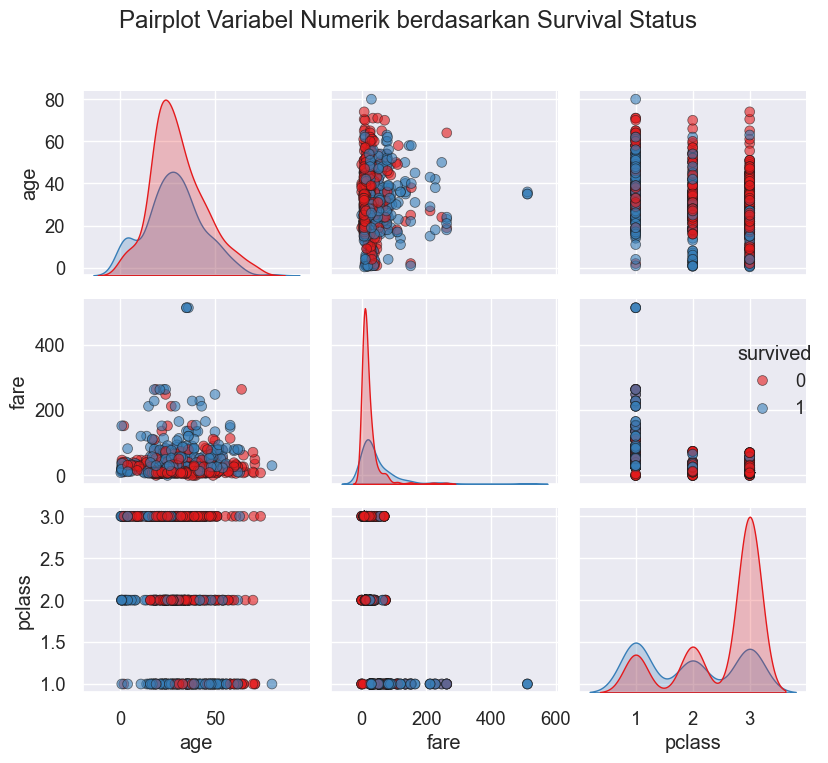

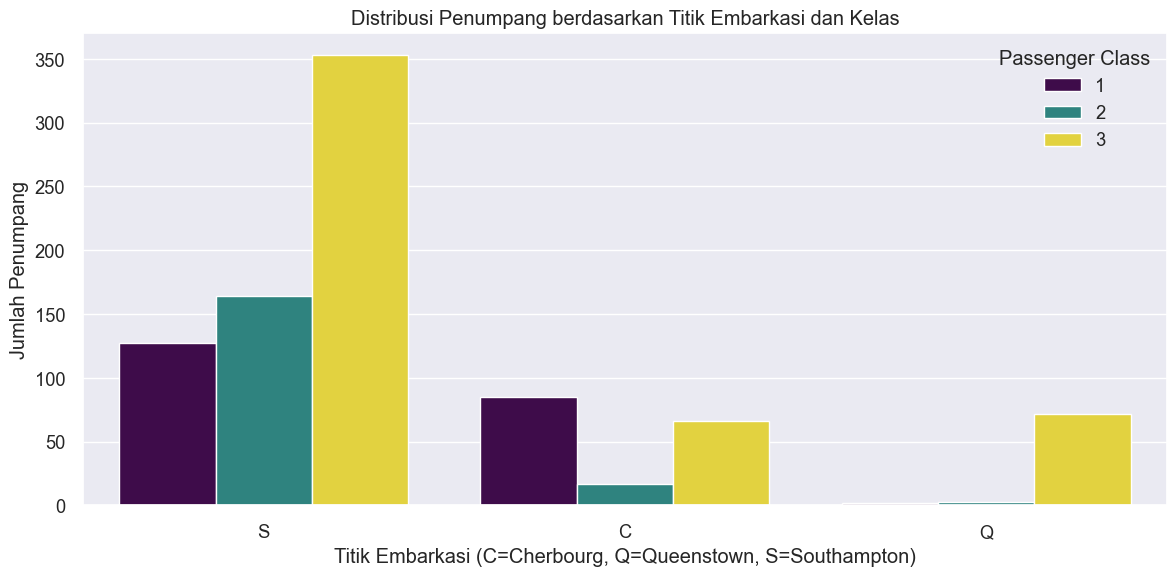

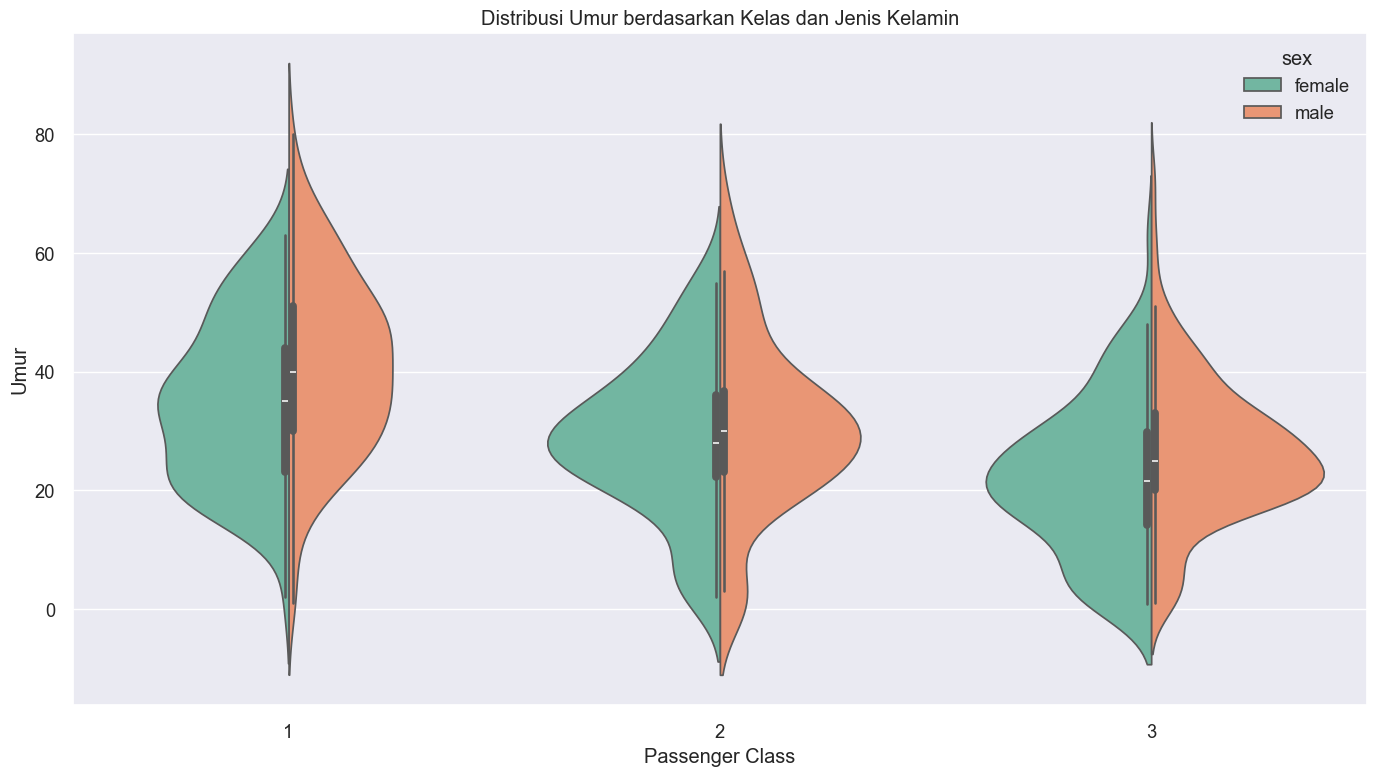

In [10]:
# Pairplot untuk melihat hubungan antar variabel numerik
plt.figure(figsize=(12, 10))
sns.pairplot(titanic, hue='survived', vars=['age', 'fare', 'pclass'], palette='Set1', diag_kind='kde',
           plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'k'})
plt.suptitle('Pairplot Variabel Numerik berdasarkan Survival Status', y=1.02)
plt.tight_layout()
plt.show()

# Distribusi penumpang berdasarkan titik embarkasi dan kelas
plt.figure(figsize=(12, 6))
sns.countplot(x='embarked', hue='pclass', data=titanic, palette='viridis')
plt.title('Distribusi Penumpang berdasarkan Titik Embarkasi dan Kelas')
plt.xlabel('Titik Embarkasi (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Passenger Class')
plt.tight_layout()
plt.show()

# Distribusi umur berdasarkan kelas dan jenis kelamin
plt.figure(figsize=(14, 8))
sns.violinplot(x='pclass', y='age', hue='sex', data=titanic, palette='Set2', split=True)
plt.title('Distribusi Umur berdasarkan Kelas dan Jenis Kelamin')
plt.xlabel('Passenger Class')
plt.ylabel('Umur')
plt.tight_layout()
plt.show()

## 6. Kesimpulan dari Analisis Eksplorasi Data

Berdasarkan analisis eksplorasi data yang telah dilakukan pada dataset Titanic, beberapa insight yang dapat diambil adalah:

1. **Tingkat Kelangsungan Hidup**
   - Sekitar 38% penumpang bertahan hidup, sementara 62% meninggal dalam tragedi Titanic.

2. **Faktor Demografis**
   - **Jenis Kelamin**: Perempuan memiliki tingkat kelangsungan hidup yang jauh lebih tinggi dibandingkan laki-laki.
   - **Kelas Penumpang**: Penumpang kelas 1 memiliki tingkat kelangsungan hidup tertinggi, diikuti kelas 2, dan kelas 3 memiliki tingkat kelangsungan hidup terendah.
   - **Umur**: Anak-anak (terutama yang berusia di bawah 12 tahun) memiliki tingkat kelangsungan hidup yang lebih tinggi dibandingkan kelompok umur lainnya.

3. **Interaksi Faktor**
   - Perempuan dari kelas 1 dan 2 memiliki tingkat kelangsungan hidup yang sangat tinggi.
   - Laki-laki dari kelas 3 memiliki tingkat kelangsungan hidup yang sangat rendah.
   - Titik embarkasi juga memiliki korelasi dengan tingkat kelangsungan hidup, dengan penumpang yang naik dari Cherbourg memiliki tingkat kelangsungan hidup yang lebih tinggi (mungkin karena lebih banyak penumpang kelas 1 naik dari sana).

4. **Faktor Ekonomi**
   - Harga tiket (fare) memiliki korelasi positif dengan kelangsungan hidup, yang mungkin terkait dengan kelas penumpang.

5. **Struktur Keluarga**
   - Jumlah saudara/pasangan (sibsp) dan jumlah orang tua/anak (parch) memiliki hubungan non-linear dengan kelangsungan hidup, di mana penumpang dengan jumlah keluarga sedang (1-3) memiliki tingkat kelangsungan hidup yang lebih tinggi dibandingkan yang sendirian atau dengan keluarga besar.

Analisis eksplorasi data ini memberikan pemahaman yang lebih baik tentang faktor-faktor yang mempengaruhi kelangsungan hidup dalam tragedi Titanic, dan dapat menjadi dasar untuk pemodelan prediktif untuk memprediksi kelangsungan hidup penumpang berdasarkan karakteristik mereka.